Welcome to the Neuroscience MRI Visualization Notebook and Jupyter Widget

Tiffany Kashima

Arizona State University

School of Complex Adaptive Science

In [1]:
import imageio as iio
import data_loading_functions as df
import app_functions as af
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
import ipywidgets as widgets
from IPython.display import display

In [2]:
#load study fole folder and save to a local variable, show basic info

myStudy = df.loadVolume()
type(myStudy)

Reading DICOM (examining files): 1/184 files (0.5161/184 files (87.5%184/184 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 184/184  (100.0%)
Description: SAG 3D T1 SPGR, Date: 20100204, Size: (184, 256, 256)


imageio.core.util.Array

In [3]:
#display meta data from study

af.metaData(myStudy)

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'AcquisitionDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'AcquisitionTime', 'ContentTime', 'Modality', 'Manufacturer', 'InstitutionName', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientAge', 'PatientWeight', 'SliceSpacing', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'PixelData', 'shape', 'sampling'])

In [4]:
#number of slices for each view

af.numSlices(myStudy)

(184, 256, 256)

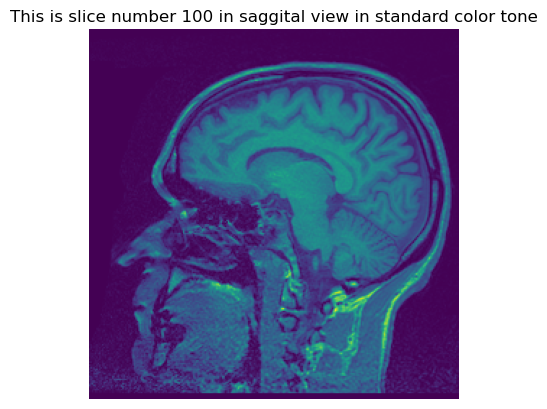

In [5]:
#show one slice

af.showSlice(myStudy)

In [6]:
# show array of one slice (first slice)
myStudy[100]

Array([[ 0,  0,  0, ...,  4,  6,  5],
       [ 0,  0,  0, ...,  9, 10,  9],
       [ 0,  0,  0, ...,  2,  5, 14],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], shape=(256, 256), dtype=int16)

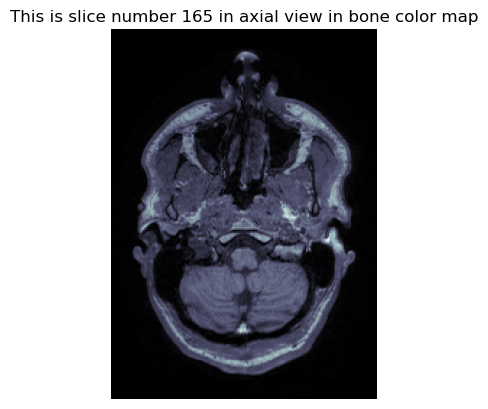

In [7]:
# show one slice in a specific view using the bone cmap as an example, allowing user to pick axis and slice number
af.pickSliceAxis(myStudy)

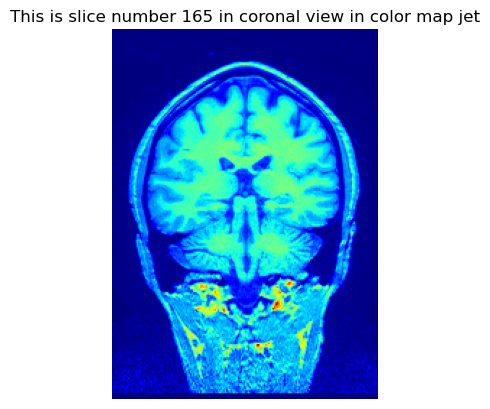

In [8]:
# add to this by allowing user to pick color as well
af.completeSlice(myStudy, af.sliceColor())

In [9]:
myStudy.meta['sampling']

(0.0, 1.0, 1.0)

In [10]:
af.getAspectRatio(myStudy)

(0.0, 0.0, 1.0)

interactive(children=(Dropdown(description='color', index=2, options=('jet', 'gray', 'bone'), value='bone'), I…

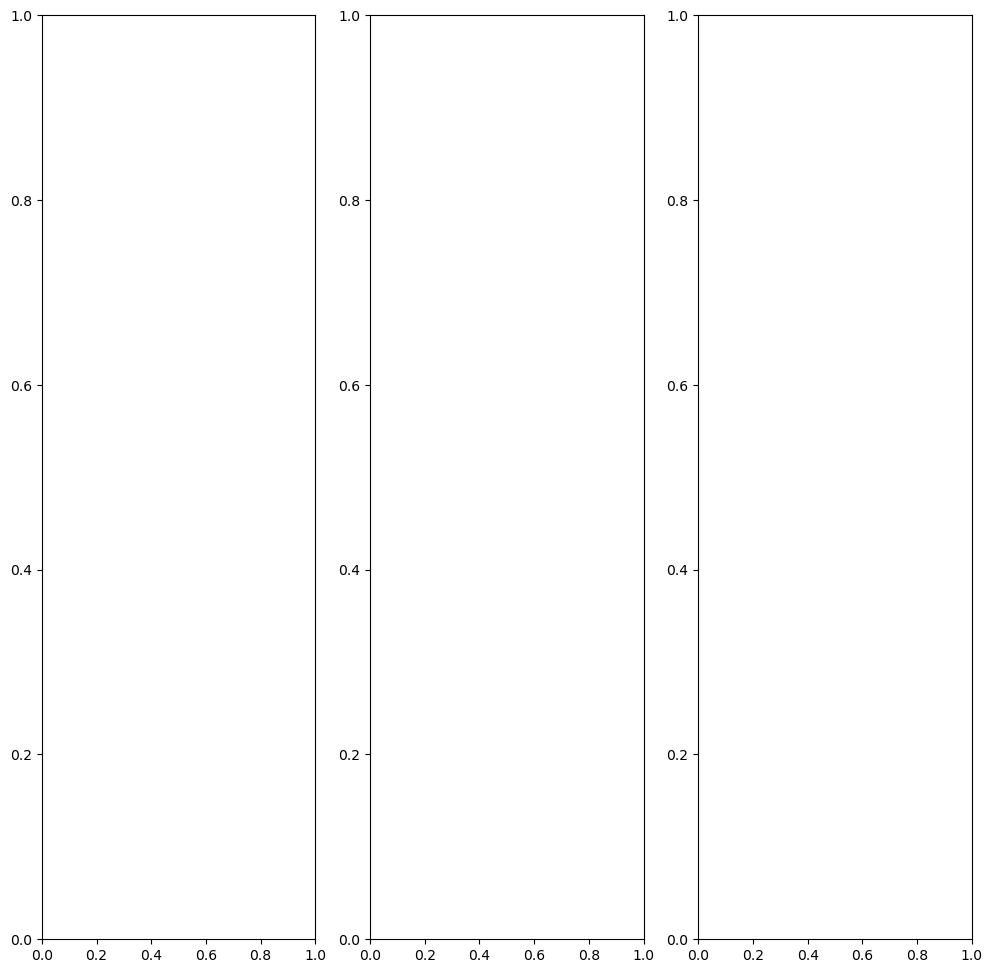

In [ ]:
s0, s1, s2 = af.numSlices(myStudy)
def imageViewer(color='bone', saggital=50, axial=175, coronal=150):
    fig, ax = plt.subplots(1,3,figsize=(12,12))
    a0, a1, a2 = af.getAspectRatio(myStudy)

    ax[0].imshow(myStudy[saggital,:,:], cmap = color, aspect=a0)
    ax[0].axis('off')
    ax[0].set_title('Saggital')

    ax[1].imshow(myStudy[:,axial,:], cmap = color, aspect=a0)
    ax[1].axis('off')
    ax[1].set_title('Axial')

    ax[2].imshow(myStudy[:,:,coronal], cmap = color, aspect=a0)
    ax[2].axis('off')
    ax[2].set_title('Coronal')

widgets.interactive(imageViewer,
    color=['jet', 'gray', 'bone'], saggital=(0,s0-1), axial=(0,s1-1), coronal=(0,s2-1))
